<a href="https://colab.research.google.com/github/Alok130802/MtechProject/blob/master/Preseantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %tensorflow_version 2.x
# import tensorflow
# device_name = tensorflow.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise  SystemError('gpu device not found')
# print('Found GPU at :{}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at :/device:GPU:0


In [0]:
# !pip install tensorflow-gpu==2.0

In [0]:

import pandas as pd
import numpy as np
from pathlib import Path
import math
import networkx as nx
from typing import Tuple, List
from math import log
from tensorflow.python import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
from tensorflow.python.keras import utils
import matplotlib.pyplot as plt


In [0]:
audcad = pd.read_csv("audcad.csv",parse_dates=True,index_col="Gmt time")
audjpy = pd.read_csv("audjpy.csv",parse_dates=True,index_col="Gmt time")
cadjpy = pd.read_csv("cadjpy.csv",parse_dates=True,index_col="Gmt time")

In [0]:
audcad = audcad[["Ask","Bid"]]
audjpy = audjpy[["Ask","Bid"]]
cadjpy = cadjpy[["Ask","Bid"]]

In [0]:
print(audcad.head())
print(audjpy.head())
print(cadjpy.head())


                             Ask      Bid
Gmt time                                 
2019-01-10 00:00:00.040  0.89406  0.89385
2019-01-10 00:00:00.192  0.89406  0.89387
2019-01-10 00:00:00.293  0.89405  0.89387
2019-01-10 00:00:01.139  0.89406  0.89387
2019-01-10 00:00:01.616  0.89408  0.89387
                            Ask     Bid
Gmt time                               
2019-01-10 00:00:00.092  72.952  72.944
2019-01-10 00:00:00.193  72.951  72.944
2019-01-10 00:00:00.294  72.951  72.944
2019-01-10 00:00:00.413  72.950  72.943
2019-01-10 00:00:00.521  72.951  72.944
                            Ask     Bid
Gmt time                               
2019-01-10 00:00:00.219  81.606  81.594
2019-01-10 00:00:00.320  81.605  81.594
2019-01-10 00:00:00.420  81.604  81.592
2019-01-10 00:00:00.572  81.605  81.594
2019-01-10 00:00:00.677  81.606  81.594


In [0]:
audcad = audcad.resample("1s").mean()
audjpy = audjpy.resample("1s").mean()
cadjpy = cadjpy.resample("1s").mean()

In [0]:
audcad.dropna(inplace=True)
audjpy.dropna(inplace=True)
cadjpy.dropna(inplace=True)

In [0]:
print(audcad.head())
print(audjpy.head())
print(cadjpy.head())

                          Ask       Bid
Gmt time                               
2019-01-10 00:00:00  0.894057  0.893863
2019-01-10 00:00:01  0.894070  0.893870
2019-01-10 00:00:02  0.894070  0.893880
2019-01-10 00:00:03  0.894060  0.893870
2019-01-10 00:00:04  0.894070  0.893890
                         Ask        Bid
Gmt time                               
2019-01-10 00:00:00  72.9510  72.943571
2019-01-10 00:00:01  72.9536  72.945600
2019-01-10 00:00:02  72.9540  72.947500
2019-01-10 00:00:03  72.9530  72.946000
2019-01-10 00:00:04  72.9540  72.949000
                           Ask        Bid
Gmt time                                 
2019-01-10 00:00:00  81.604857  81.593571
2019-01-10 00:00:01  81.606857  81.595571
2019-01-10 00:00:02  81.608800  81.596200
2019-01-10 00:00:03  81.609500  81.597000
2019-01-10 00:00:04  81.608333  81.596333


In [0]:
audcad =audcad.values
audjpy = audjpy.values
cadjpy = cadjpy.values

In [0]:
audjpy = audjpy /100
cadjpy = cadjpy /100

In [0]:
audjpy.shape

(36519, 2)

In [0]:
n_timestamp = 3
n_feature = 2
n_future = 1
epochs= 50
n_unit = 128


In [0]:
# create data 
def transform_data(data,n_timestamp,n_future):
  x = []
  y = []
  for i in range(len(data) - (n_timestamp+n_future)):
    k = data[i:i+n_timestamp].tolist()
    a = data[i+n_timestamp:i+n_timestamp+n_future].tolist()
    
    x.append(k)
    y.append(a)
    # y.append(np.transpose(a))
  return np.array(x),np.array(y)
audcad_x,audcad_y = transform_data(audcad,n_timestamp,n_future)
print(audcad_x.shape,audcad_y.shape)







(40676, 3, 2) (40676, 1, 2)


In [0]:
audcad_x[0],audcad_y[0]

(array([[0.89405667, 0.89386333],
        [0.89407   , 0.89387   ],
        [0.89407   , 0.89388   ]]), array([[0.89406, 0.89387]]))

In [0]:
audcad_y.shape

(40676, 1, 2)

In [0]:


audcad_x,audcad_y = transform_data(audcad,n_timestamp,n_future)
audjpy_x,audjpy_y = transform_data(audjpy,n_timestamp,n_future)
cadjpy_x,cadjpy_y = transform_data(cadjpy,n_timestamp,n_future)
# audcad_x = audcad_x.reshape(audcad_x.shape[0],audcad_x.shape[1],1)
# audjpy_x = audjpy_x.reshape(audjpy_x.shape[0],audjpy_x.shape[1],1)
# cadjpy_x = cadjpy_x.reshape(cadjpy_x.shape[0],cadjpy_x.shape[1],1)

In [0]:
audcad_x[0],audcad_y[0]

(array([[0.89405667, 0.89386333],
        [0.89407   , 0.89387   ],
        [0.89407   , 0.89388   ]]), array([[0.89406, 0.89387]]))

In [0]:
audcad_x_train = audcad_x[:40000]
audcad_x_test = audcad_x[40000:]
audcad_y_train= audcad_y[:40000]
audcad_y_test = audcad_y[40000:]

audjpy_x_train = audjpy_x[:30000]
audjpy_x_test = audjpy_x[30000:]
audjpy_y_train= audjpy_y[:30000]
audjpy_y_test = audjpy_y[30000:]

cadjpy_x_train = cadjpy_x[:40000]
cadjpy_x_test = cadjpy_x[40000:]
cadjpy_y_train= cadjpy_y[:40000]
cadjpy_y_test = cadjpy_y[40000:]

In [0]:
audcad_y_train.shape
start = np.array([[[0.1,0.1]]])
audcad_y_train.shape,start.shape

decoder_input = np.vstack([start,audcad_y_train])
decoder_input = decoder_input[:-1]


In [0]:
decoder_input.shape

(40000, 1, 2)

In [0]:
 
def create_model(n_input, n_output, n_units):
	# define training encoder
	encoder_inputs = layers.Input(shape=(n_timestamp,n_feature))
	encoder = layers.LSTM(n_units, return_state=True)
	encoder_outputs, state_h, state_c = encoder(encoder_inputs)
	encoder_states = [state_h, state_c]
	# define training decoder
	decoder_inputs = layers.Input(shape=(n_future, n_feature))
	decoder_lstm = layers.LSTM(n_units, return_sequences=True, return_state=True)
	decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
	decoder_dense = layers.Dense(n_output, activation='relu')
	decoder_outputs = decoder_dense(decoder_outputs)
	model = models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
	# define inference encoder
	encoder_model = models.Model(encoder_inputs, encoder_states)
	# define inference decoder
	decoder_state_input_h = layers.Input(shape=(n_units,))
	decoder_state_input_c = layers.Input(shape=(n_units,))
	decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
	decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
	decoder_states = [state_h, state_c]
	decoder_outputs = decoder_dense(decoder_outputs)
	decoder_model = models.Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
	# return all models
	return model, encoder_model, decoder_model



In [0]:
print(audcad_x_train.shape)
print(audcad_y_train.shape)
model,encoder,decoder = create_model(n_timestamp,n_future,n_unit)



(40000, 3, 2)
(40000, 1, 2)


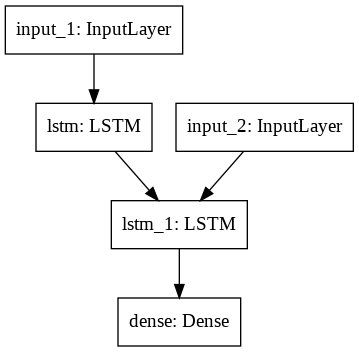

In [0]:
keras.utils.plot_model(model)

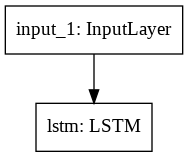

In [0]:
keras.utils.plot_model(encoder)

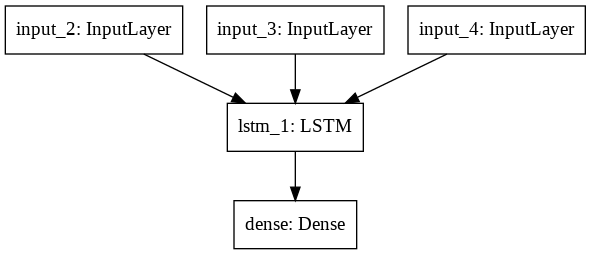

In [0]:
keras.utils.plot_model(decoder)

In [0]:
model.compile(optimizer="sgd", loss=keras.losses.KLDivergence(), metrics=['mse'])
model.fit([audcad_x_train,decoder_input],audcad_y_train,epochs=2,validation_split=0.2)


Train on 32000 samples, validate on 8000 samples
Epoch 1/2
32000/32000 [==============================] - 15s 467us/sample - loss: 28.4629 - mse: 0.7911 - val_loss: 28.3526 - val_mse: 0.7853
Epoch 2/2
32000/32000 [==============================] - 9s 281us/sample - loss: 28.4629 - mse: 0.7911 - val_loss: 28.3526 - val_mse: 0.7853


In [0]:
x_input = audcad_x_train[0]
x_input = x_input.reshape(1,x_input.shape[0],x_input.shape[1])
y_output = audcad_y_train[0]
a = encoder.predict(x_input)

In [0]:
np.array(a).shape

(2, 1, 128)

In [0]:
x = [[1,2,3,4],[3,4,5,6]]
y = [3,4,5,6]
x+y

[[1, 2, 3, 4], [3, 4, 5, 6], 3, 4, 5, 6]

In [0]:
output = []
print(audcad_y_train[0].shape)
st = audcad_x_train[0]
print(a.shape)
# st = st.reshape(2,1,1)

yhat, h, c = decoder.predict([st]+a)

output.append(yhat)
print(yhat)
		# update state


(1, 2)


AttributeError: ignored

In [0]:
def plot_train(history,epochs):
  output = history.history
  x_axis = np.array(range(5,epochs))
  loss= output["loss"]
  val_loss = output["val_loss"]
  plt.plot(x_axis,loss[5:])
  plt.plot(x_axis,val_loss[5:])
  plt.xlabel("epochs")
  plt.ylabel("mse loss")
  plt.show()
  


In [0]:
def plot_predicted(model,x_test,y_test):
  plt.clf()
  predicted = model.predict(x_test)
  plt.plot(predicted)
  plt.plot(y_test)
  plt.show()

In [0]:
print(audcad_x_train.shape)
print(audcad_y_train.shape)
model,encoder,decoder = create_model(n_timestamp,n_future,n_unit)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(audcad_x,audcad_y,epochs=1,validation_split=0.2)

# audcad_model,audcad_history = create_model(audcad_x_train,audcad_y_train,"audcad.h5")
# plot_train(audcad_history,epochs)
# plot_predicted(audcad_model,audcad_x_test,audcad_y_test)



In [0]:
audjpy_model,audjpy_history = create_model(audjpy_x_train,audjpy_y_train,"audjpy.h5")
plot_train(audjpy_history,epochs)
plot_predicted(audjpy_model,audjpy_x_test,audjpy_y_test)


In [0]:

cadjpy_model,cadjpy_history = create_model(cadjpy_x_train,cadjpy_y_train,"cadjpy.h5")
plot_train(cadjpy_history,epochs)
plot_predicted(cadjpy_model,cadjpy_x_test,cadjpy_y_test)



In [0]:
def prediction(model,time_forword_steps,startpoint):
  start = []
  predicted = list()
  for i in startpoint[0]:
    start.append(i)
  for i in range(10):
    input_data = np.array(start) 
    input_data = input_data.reshape(1,input_data.shape[0],input_data.shape[1])
    pred = audcad_model.predict(input_data)
    predicted.append(pred[0])
    start.pop(0)
    start.append(pred)
  y_real = audcad_y_test[:10]
  plt.plot(y_real)
  plt.plot(predicted)
  plt.show()

  


In [0]:
# Calculate arbitrage


In [0]:
def negate_logarithm_convertor(graph: Tuple[Tuple[float]]) -> List[List[float]]:
    ''' log of each rate in graph and negate it'''
    result = [[-log(edge) for edge in row] for row in graph]
    return result 
    

In [0]:
    ''' Calculates arbitrage situations and prints out the details of this calculations'''

    trans_graph = negate_logarithm_convertor(rates_matrix)

    # Pick any source vertex -- we can run Bellman-Ford from any vertex and get the right result

    source = 0
    n = len(trans_graph)
    min_dist = [float('inf')] * n

    pre = [-1] * n
    
    min_dist[source] = source

    # 'Relax edges |V-1| times'
    for _ in range(n-1):
        for source_curr in range(n):
            for dest_curr in range(n):
                if min_dist[dest_curr] > min_dist[source_curr] + trans_graph[source_curr][dest_curr]:
                    min_dist[dest_curr] = min_dist[source_curr] + trans_graph[source_curr][dest_curr]
                    pre[dest_curr] = source_curr

    # if we can still relax edges, then we have a negative cycle
    for source_curr in range(n):
        for dest_curr in range(n):
            if min_dist[dest_curr] > min_dist[source_curr] + trans_graph[source_curr][dest_curr]:
                # negative cycle exists, and use the predecessor chain to print the cycle
                print_cycle = [dest_curr, source_curr]
                # Start from the source and go backwards until you see the source vertex again or any vertex that already exists in print_cycle array
                while pre[source_curr] not in  print_cycle:
                    print_cycle.append(pre[source_curr])
                    source_curr = pre[source_curr]
                print_cycle.append(pre[source_curr])
                print("Arbitrage Opportunity: \n")
                print(" --> ".join([currencies[p] for p in print_cycle[::-1]]))